In [3]:
import pandas as pd


In [7]:
data = pd.read_excel("~/class.xlsx")

In [8]:
data.head()

,The perceptron as a gradient algorithm,Height,Weight,Gender,Age,Sporthours/week,"Location: (0 Village, 1: Town, 2: City, 3: Megacity)"
0,CD,178,81,M,49,7,1
1,TB,180,75,M,22,16,1
2,BL,169,53,F,20,0,2
3,KG,183,80,M,25,1,1
4,TR,190,65,M,25,5,0


In [9]:
X = data["Height"]
Y = data["Weight"]

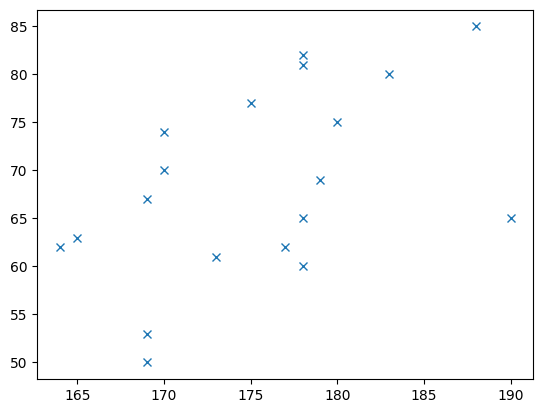

In [11]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'x')

In [12]:
def mse_loss(f, X, Y):
    mse = 0
    for t in range(len(Y)):
        a = f.predict(X)
        mse += (a - y)**2
    return t / len(Y)


In [13]:
class linear_function:
    def __init__(self, n):
        self.params = np.zeros(n)
        self.n_in = n
    def predict(x):
        x.append(x)
        return np.dot(self.params, x)

In [ ]:
a = 0
n_samples = 100
beta = np.arange(0, n_samples)/n_samples
for k in range(n_samples):
    